In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pylab as plt

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:

%%time
data_root = os.path.join("/", "mnt", "hgfs", "Temp", "data", "job_september", "base")
wave_path =os.path.join(data_root, "wavenet") 


CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 37.9 µs


In [4]:

wavenet_loc = gpd.read_file(os.path.join(wave_path, 'WaveNet_Locations', 'Wave_Buoy_Locations.shp'))
wavenet_data = pd.read_csv(os.path.join(wave_path, 'WaveNet_Data', 'dowsing-wavenet-site.csv'), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) #encoding = "utf-8")


/home/ubuntu/anaconda3/envs/job/lib/python3.7/site-packages/pandas/io/parsers/readers.py:586: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return _read(filepath_or_buffer, kwds)


In [5]:
wavenet_data

Time (GMT)  Average (mean) wave direction (degrees)  \
0       2003-10-06 12:30:00                                      NaN   
1       2003-10-06 13:00:00                                      NaN   
2       2003-10-06 13:30:00                                      NaN   
3       2003-10-06 14:00:00                                      NaN   
4       2003-10-06 14:30:00                                      NaN   
...                     ...                                      ...   
293594  2020-09-02 05:00:00                                      NaN   
293595  2020-09-02 05:30:00                                      NaN   
293596  2020-09-02 06:00:00                                      NaN   
293597  2020-09-02 06:30:00                                      NaN   
293598  2020-09-02 07:00:00                                      NaN   

        Average (zero crossing) wave period (s)  \
0                                           4.9   
1                                           4.9   
2                                           5.1   
3                                           4.9   
4                                           5.0   
...                                         ...   
293594                                      4.1   
293595                                      4.0   
293596                                      3.9   
293597                                      3.9   
293598                                      3.8   

        Dominant (peak) wave direction (degrees)  \
0                                          311.0   
1                                          295.0   
2                                          295.0   
3                                          293.0   
4                                          280.0   
...                                          ...   
293594                                      82.0   
293595                                     104.0   
293596                                      93.0   
293597                                      89.0   
293598                                      80.0   

        Dominant (peak) wave period (s)  Maximum wave height (m)  \
0                                   5.9                      NaN   
1                                   5.6                      NaN   
2                                   5.6                      NaN   
3                                   5.9                      NaN   
4                                   5.9                      NaN   
...                                 ...                      ...   
293594                              5.6                      NaN   
293595                              5.0                      NaN   
293596                              5.0                      NaN   
293597                              5.0                      NaN   
293598                              4.5                      NaN   

        Significant wave height (Hm0) (m)  Temperature (°C)  \
0                                    2.52             14.05   
1                                    2.75             14.10   
2                                    2.86             14.35   
3                                    2.63             14.35   
4                                    2.51             14.35   
...                                   ...               ...   
293594                               0.48             14.90   
293595                               0.46             14.90   
293596                               0.46             14.90   
293597                               0.46             14.95   
293598                               0.45             14.95   

        Wave spread (degrees)  
0                        23.0  
1                        21.0  
2                        24.0  
3                        34.0  
4                        27.0  
...                       ...  
293594                   56.0  
293595                   52.0  
293596                   56.0  
293597              

0 Time (GMT)
1 Average (mean) wave direction (degrees)
2 Average (zero crossing) wave period (s)
3 Dominant (peak) wave direction (degrees)
4 Dominant (peak) wave period (s)
5 Maximum wave height (m)
6 Significant wave height (Hm0) (m)
7 Temperature (°C)
8 Wave spread (degrees)


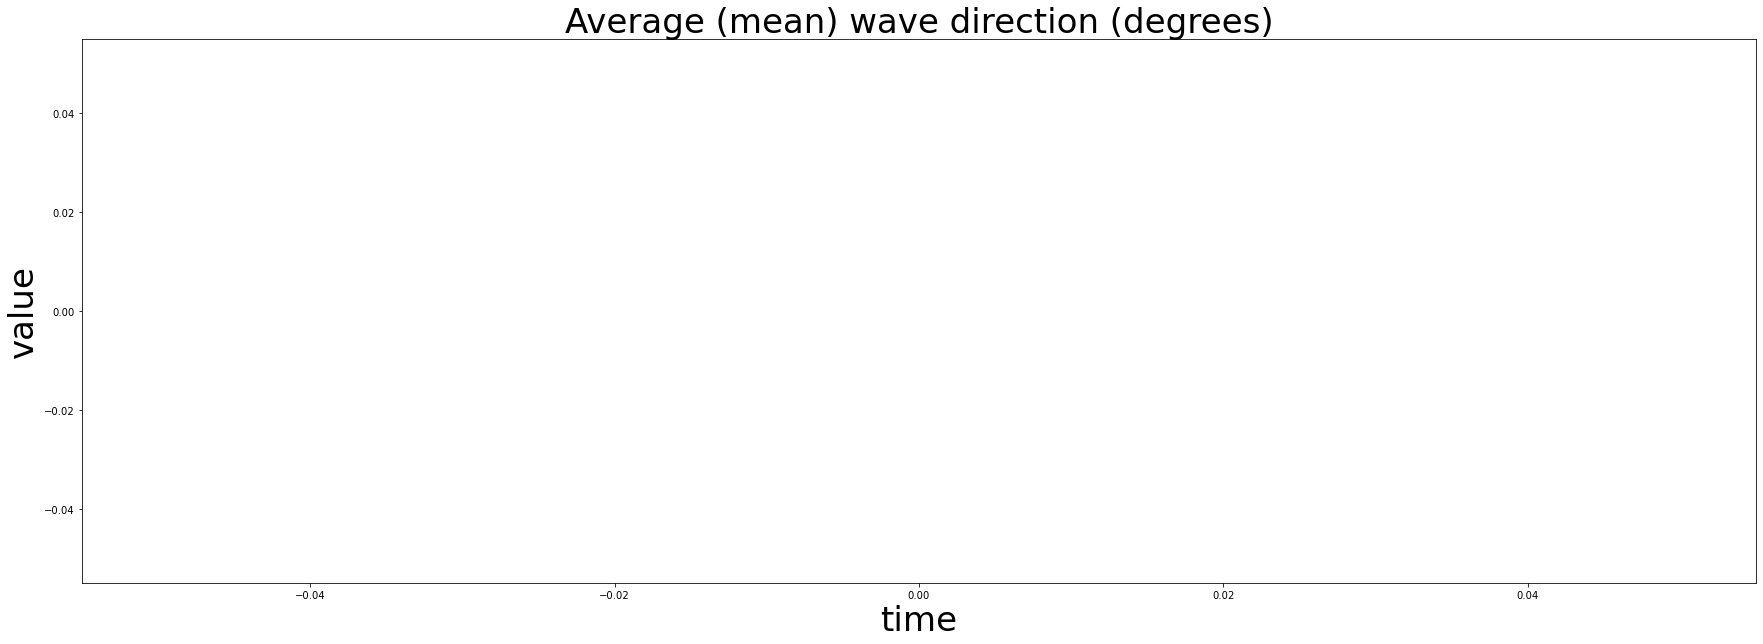

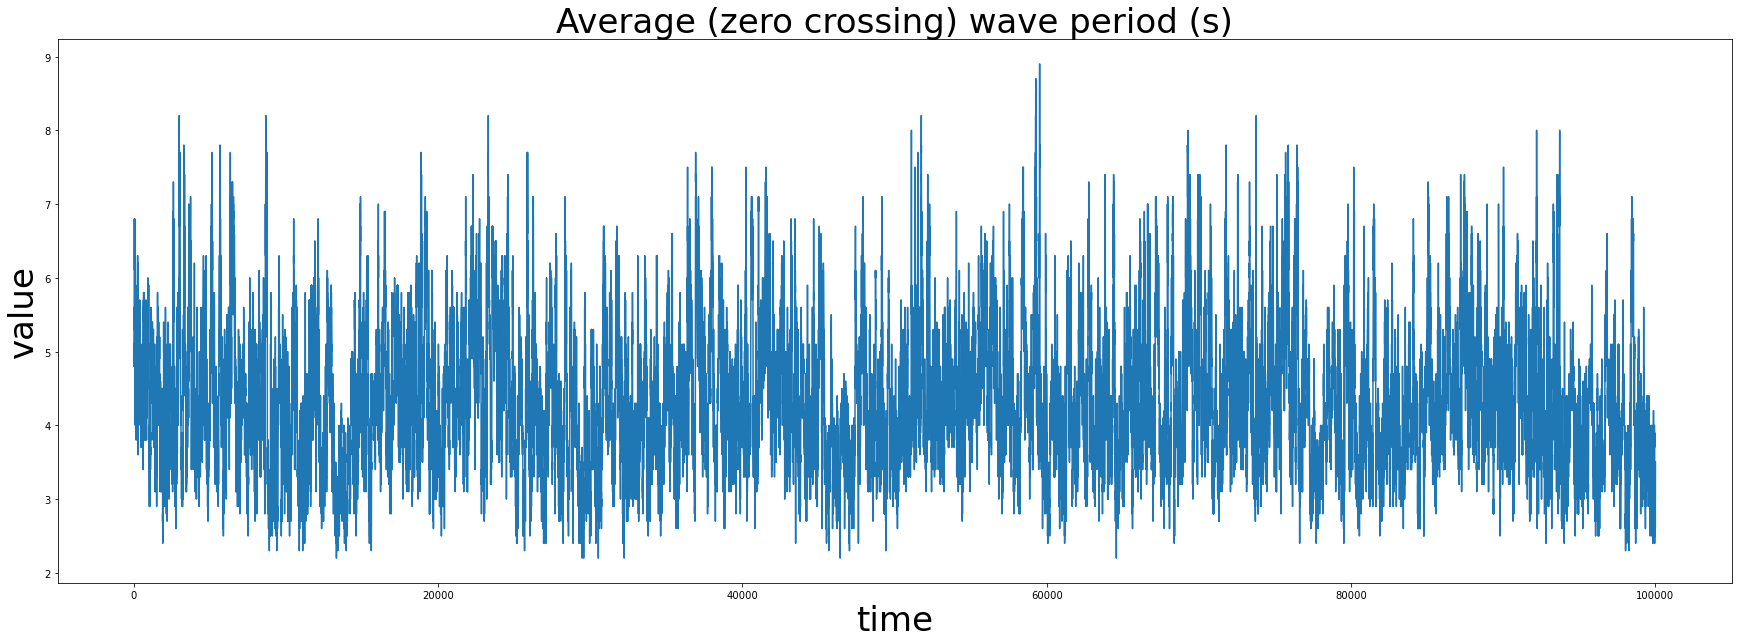

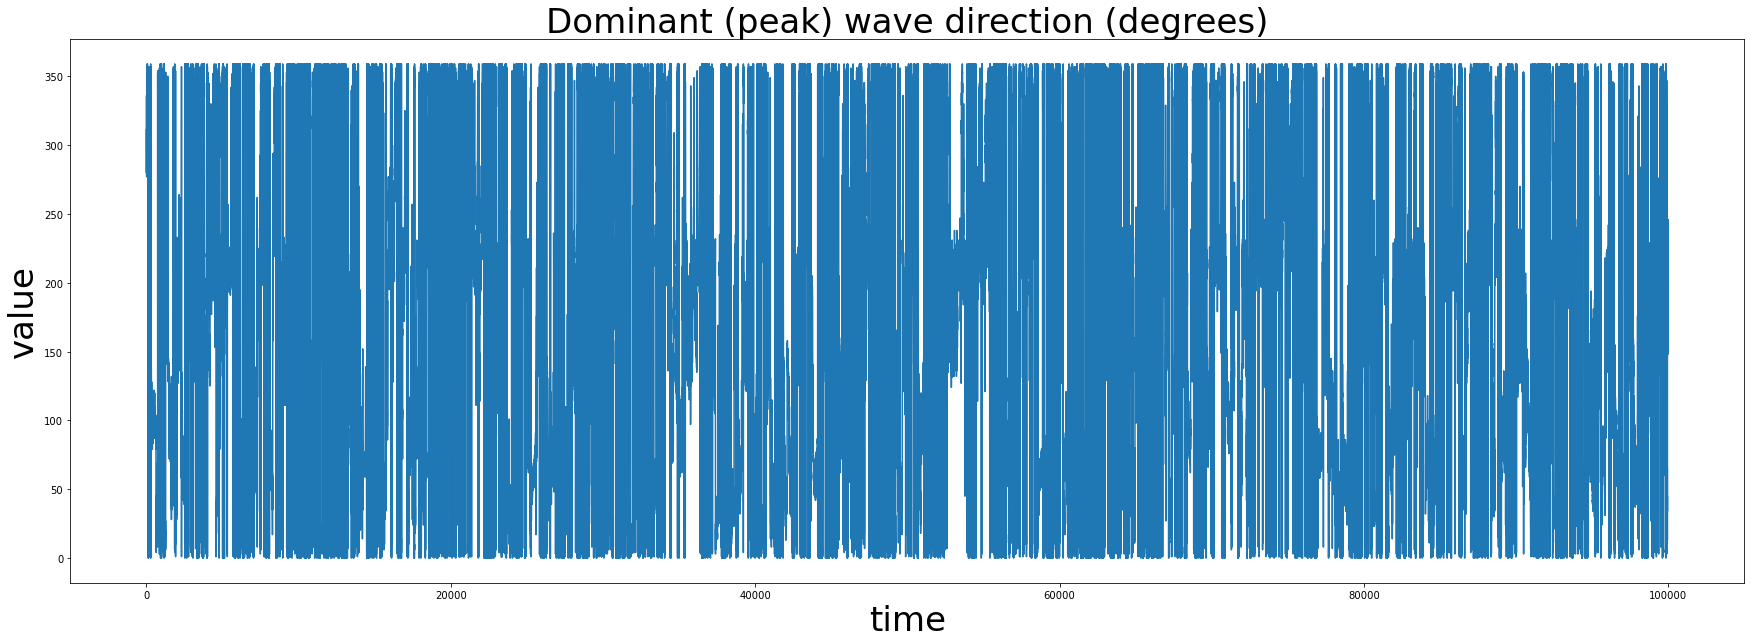

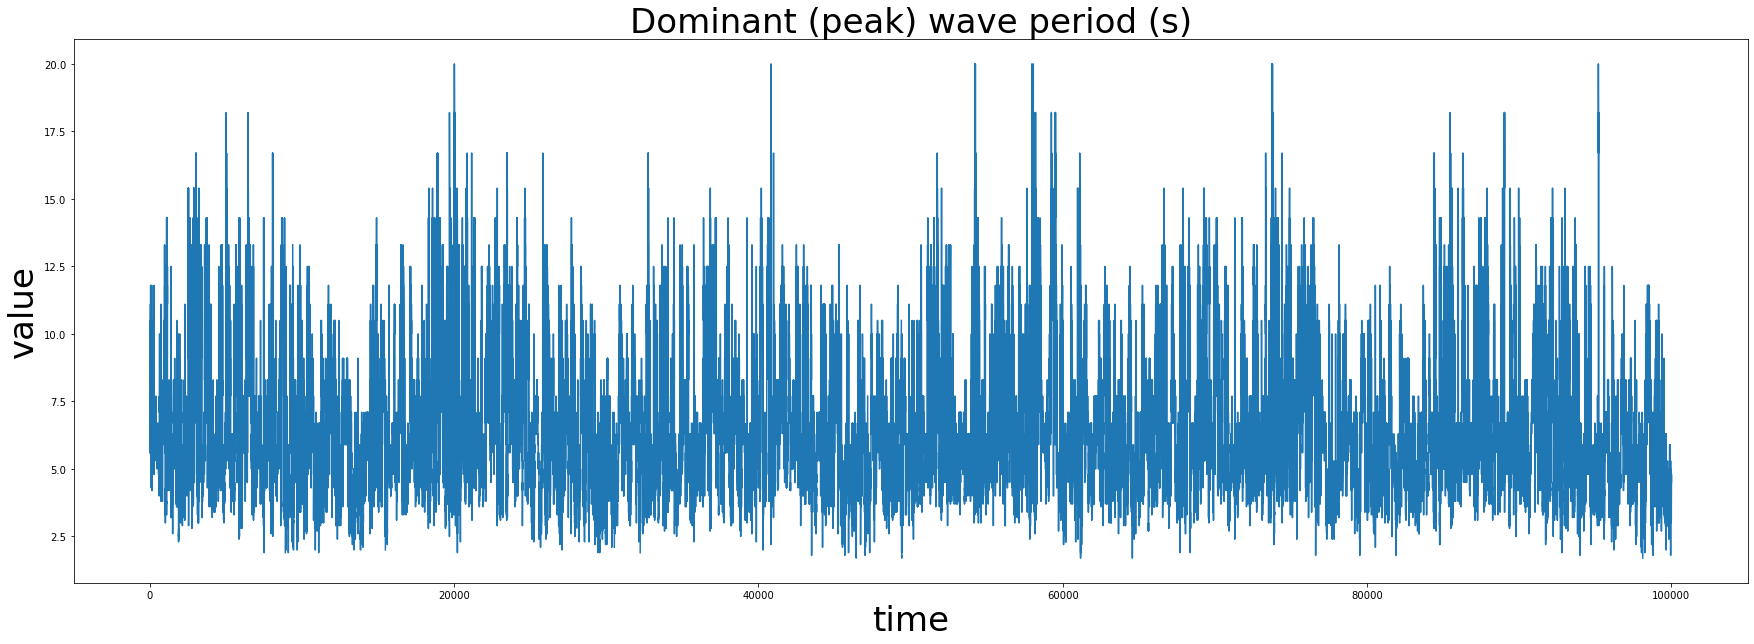

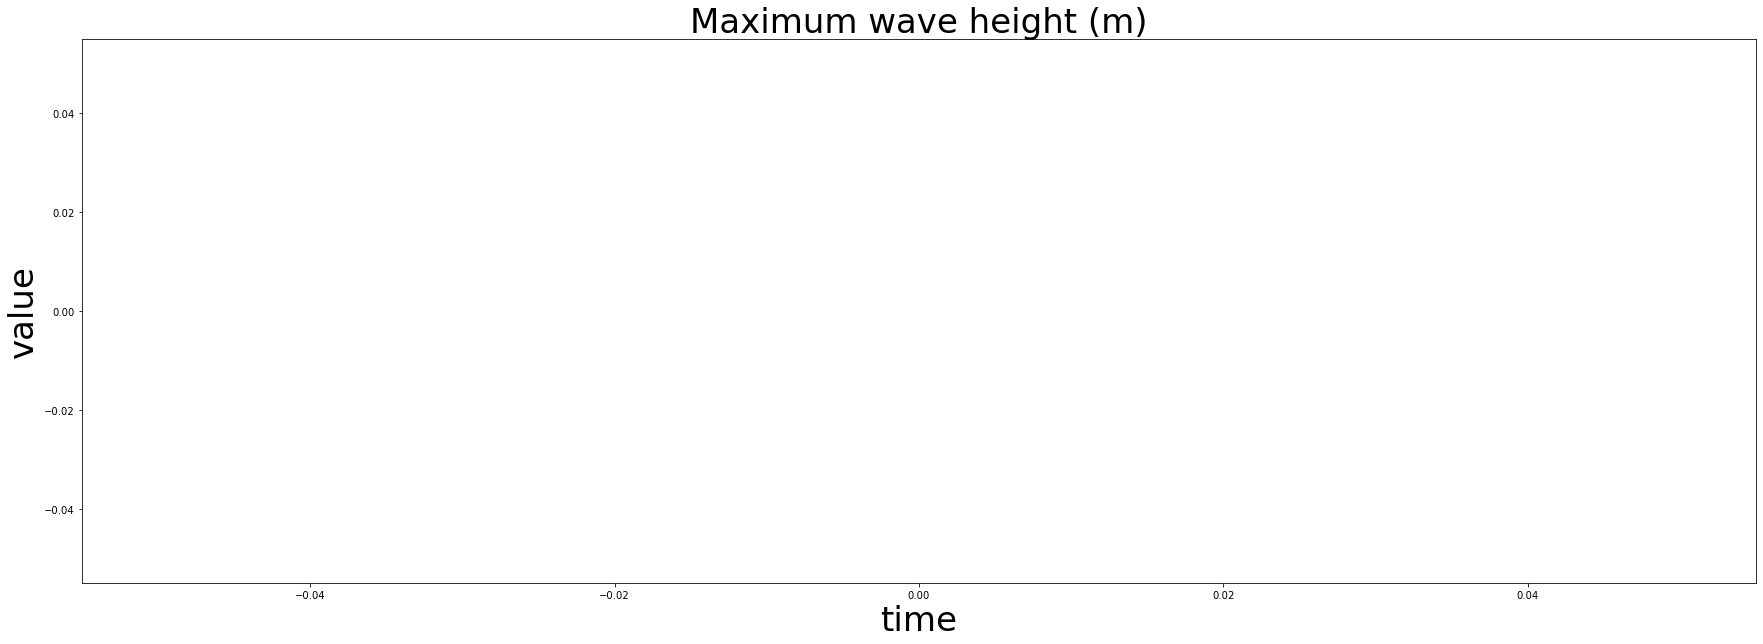

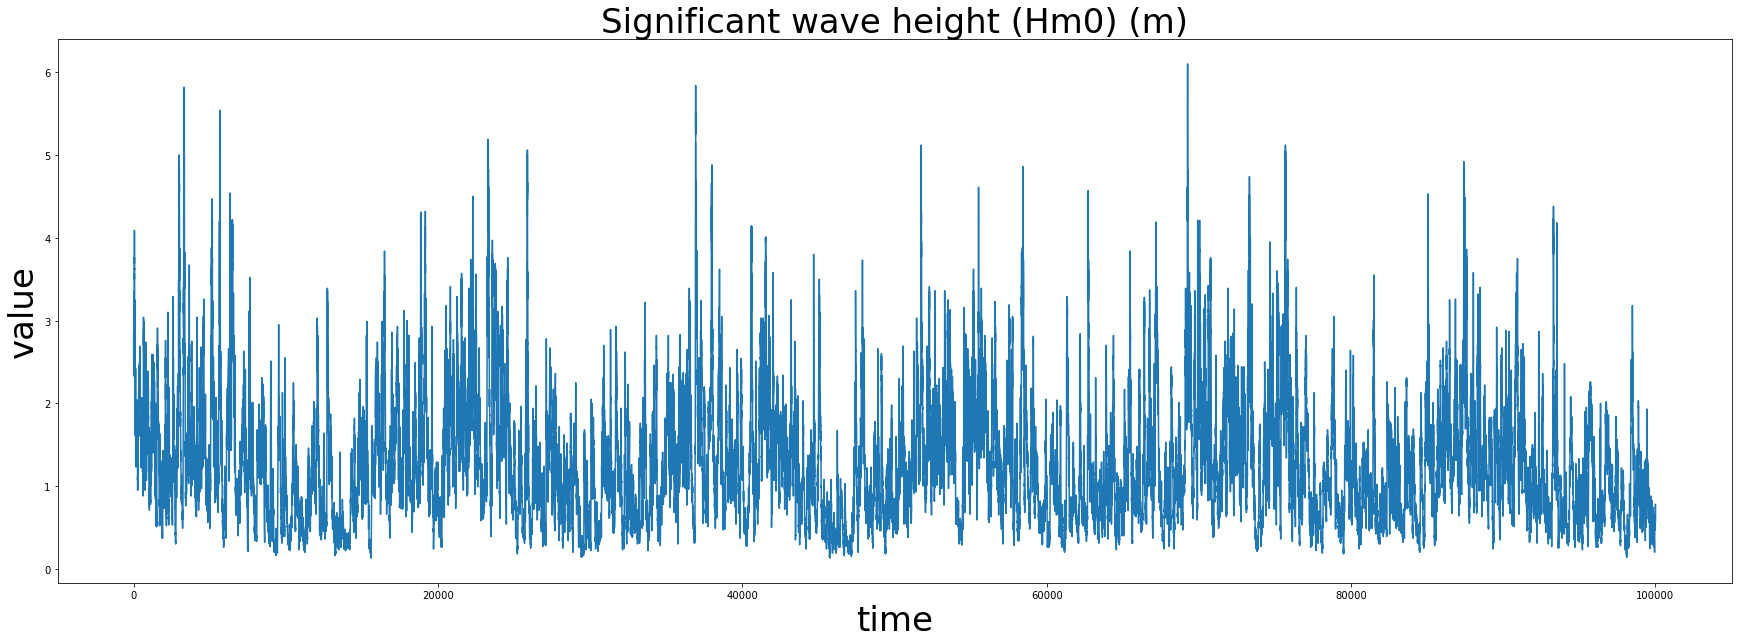

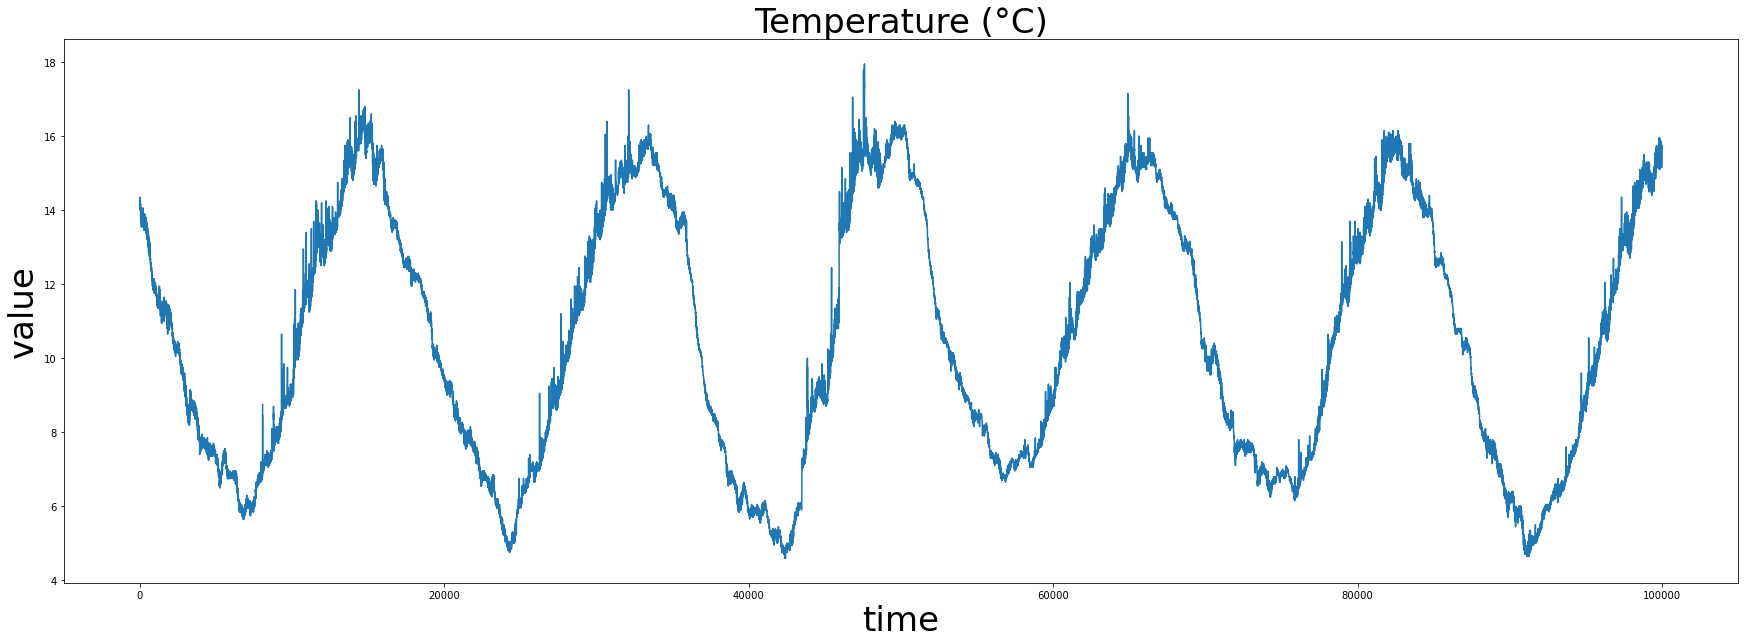

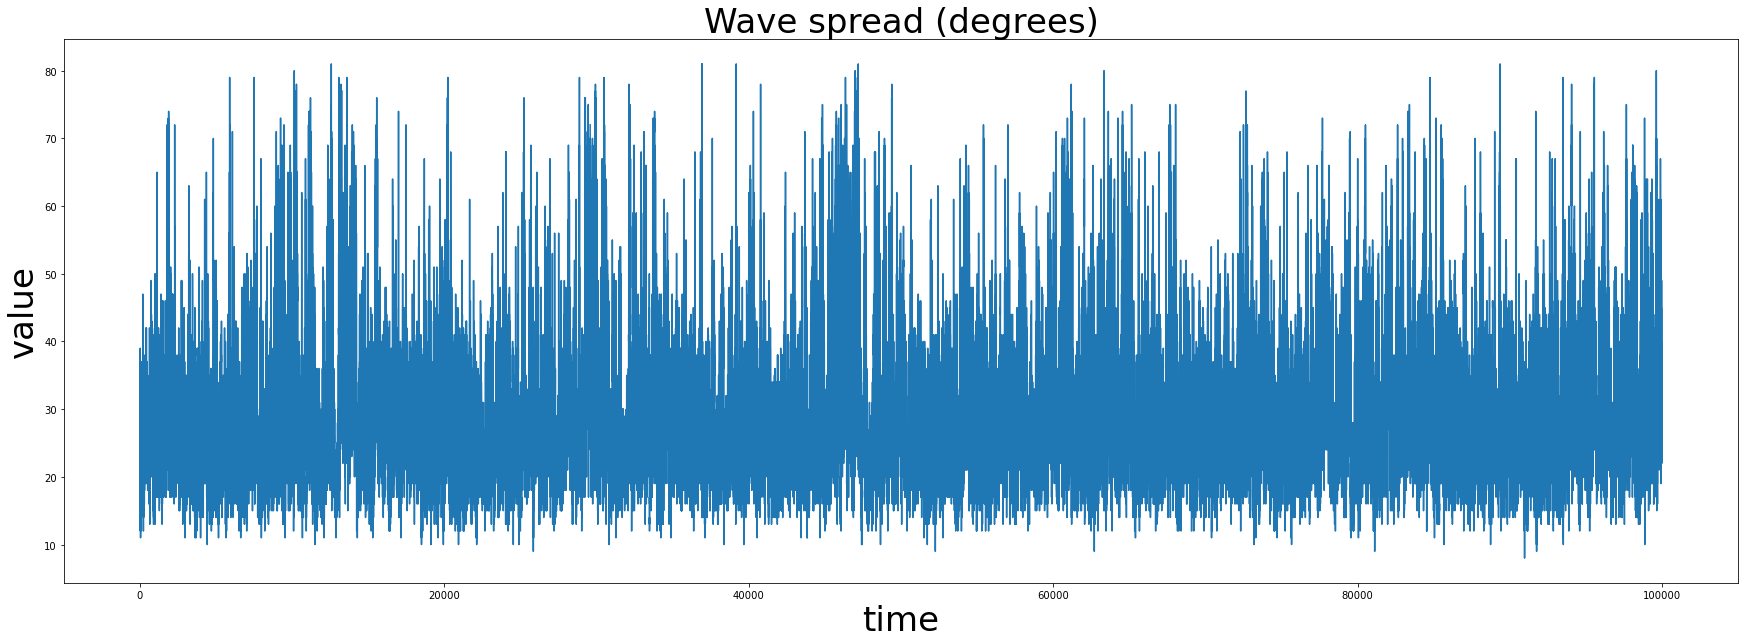

In [6]:
for ind, column in enumerate(wavenet_data.columns):
    print(ind, column)
    if ind != 0:
        fig, ax = plt.subplots(figsize=(30, 10))
        wavenet_data[column].head(100000).plot(ax=ax)
        ax.set_xlabel('time',  fontsize=34)
        ax.set_ylabel('value',  fontsize=34)
        ax.set_title(column, fontsize=34)
        

In [137]:
# https://plotly.com/python/wind-rose-charts/

In [138]:
def deg_to_text(deg):
    return ["N","NNE","NE","ENE","E","ESE", "SE", "SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"][round(deg/22.5)%16]


In [139]:
wavenet_data = wavenet_data.drop(columns=['Average (mean) wave direction (degrees)', 'Maximum wave height (m)'])


In [140]:
wavenet_data = wavenet_data.dropna()

In [141]:

wavenet_data['compass'] = wavenet_data.apply(lambda x: deg_to_text(x['Dominant (peak) wave direction (degrees)']), axis=1)

In [142]:
table = wavenet_data['compass'].value_counts()
table_df = table.to_frame()
table_df.reset_index(inplace=True)

table_df.columns = ['direction','frequency']
table_df.direction = table_df.direction.astype('O')
table_df.frequency = table_df.frequency.astype('f')
#tuple(list(open_reqs['REQ_NUM']))

In [153]:
wavenet_data

Time (GMT)  Average (zero crossing) wave period (s)  \
0       2003-10-06 12:30:00                                      4.9   
1       2003-10-06 13:00:00                                      4.9   
2       2003-10-06 13:30:00                                      5.1   
3       2003-10-06 14:00:00                                      4.9   
4       2003-10-06 14:30:00                                      5.0   
...                     ...                                      ...   
293594  2020-09-02 05:00:00                                      4.1   
293595  2020-09-02 05:30:00                                      4.0   
293596  2020-09-02 06:00:00                                      3.9   
293597  2020-09-02 06:30:00                                      3.9   
293598  2020-09-02 07:00:00                                      3.8   

        Dominant (peak) wave direction (degrees)  \
0                                          311.0   
1                                          295.0   
2                                          295.0   
3                                          293.0   
4                                          280.0   
...                                          ...   
293594                                      82.0   
293595                                     104.0   
293596                                      93.0   
293597                                      89.0   
293598                                      80.0   

        Dominant (peak) wave period (s)  Significant wave height (Hm0) (m)  \
0                                   5.9                               2.52   
1                                   5.6                               2.75   
2                                   5.6                               2.86   
3                                   5.9                               2.63   
4                                   5.9                               2.51   
...                                 ...                                ...   
293594                              5.6                               0.48   
293595                              5.0                               0.46   
293596                              5.0                               0.46   
293597                              5.0                               0.46   
293598                              4.5                               0.45   

        Temperature (°C)  Wave spread (degrees) compass  
0                  14.05                   23.0      NW  
1                  14.10                   21.0     WNW  
2                  14.35                   24.0     WNW  
3                  14.35                   34.0     WNW  
4                  14.35                   27.0       W  
...                  ...                    ...     ...  
293594             14.90                   56.0       E  
293595             14.90                   52.0     ESE  
293596             14.90                   56.0       E  
293597             14.95                   48.0       E  
293598             14.95                   54.0       E  

[292109 rows x 8 columns]

In [168]:
grp = wavenet_data.groupby(["compass"]).size().reset_index(name="frequency")
#"Significant wave height (Hm0) (m)"
grp['[]']

In [173]:
grp['strength'] = 1

In [174]:
grp

compass  frequency  strenth
0        E      12058        1
1      ENE      16943        1
2      ESE      10109        1
3        N      66560        1
4       NE      17578        1
5      NNE      22167        1
6      NNW      37624        1
7       NW       4605        1
8        S       8332        1
9       SE      21138        1
10     SSE       7684        1
11     SSW      21181        1
12      SW      26179        1
13       W       6803        1
14     WNW       4893        1
15     WSW       8255        1

In [176]:
import plotly.express as px
fig = px.bar_polar(grp, r="frequency", theta="compass",
    template="plotly_dark", color="strength",
    color_discrete_sequence=px.colors.sequential.Plasma_r
)
fig.show()
#is frequency a percentage

TypeError: isinstance() arg 2 must be a type or tuple of types

In [120]:

df = px.data.wind()
fig = px.bar_polar(table_df, r="frequency", theta="direction",
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

TypeError: isinstance() arg 2 must be a type or tuple of types

In [ ]:
  color="strength",

In [63]:
a

Empty DataFrame
Columns: [Time (GMT), Average (mean) wave direction (degrees), Average (zero crossing) wave period (s), Dominant (peak) wave direction (degrees), Dominant (peak) wave period (s), Maximum wave height (m), Significant wave height (Hm0) (m), Temperature (°C), Wave spread (degrees), name]
Index: []

In [47]:
import plotly.express as px
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction",
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

In [177]:
df

direction strength  frequency
0           N      0-1        0.5
1         NNE      0-1        0.6
2          NE      0-1        0.5
3         ENE      0-1        0.4
4           E      0-1        0.4
..        ...      ...        ...
123       WSW       6+        0.1
124         W       6+        0.9
125       WNW       6+        2.2
126        NW       6+        1.5
127       NNW       6+        0.2

[128 rows x 3 columns]

In [178]:
grp

compass  frequency  strenth
0        E      12058        1
1      ENE      16943        1
2      ESE      10109        1
3        N      66560        1
4       NE      17578        1
5      NNE      22167        1
6      NNW      37624        1
7       NW       4605        1
8        S       8332        1
9       SE      21138        1
10     SSE       7684        1
11     SSW      21181        1
12      SW      26179        1
13       W       6803        1
14     WNW       4893        1
15     WSW       8255        1

In [14]:
file_list = os.listdir(os.path.join(wave_path, 'WaveNet_Data'))
first = True
for file in file_list:
    print(file)
    wavenet_data = pd.read_csv(os.path.join(wave_path, 'WaveNet_Data', file), 
                           encoding = "ISO-8859-1", engine='python', index_col = False) 
    wavenet_data['name'] = file[:-4]
    if first == True:
        data = wavenet_data
        first = False
    else:
        data =  data.append(wavenet_data)

tynetees-wavenet-site.csv
sw-isles-of-scilly-wavenet-site.csv
hastings-wavenet-site.csv
liverpool-bay-wavenet-site.csv
south-pembrokeshire-wavenet-site.csv
southwold-approach-wavenet-site.csv
poole-bay-wavenet-site.csv
scarweather-wavenet-site.csv
moray-firth-wavenet-site.csv
firth-of-forth-wavenet-site.csv
dowsing-wavenet-site.csv
blackstones-wavenet-site.csv
west-gabbard-2-wavenet-site.csv
south-knock-wavenet-site.csv
west-of-hebrides-wavenet-site.csv


In [15]:
data[["Time (GMT)"]] = data[["Time (GMT)"]].apply(pd.to_datetime)
data = data.set_index('Time (GMT)')
data = data.sort_index()
data['dayofyear'] = data.index.dayofyear 
data['hour'] = data.index.hour


In [16]:
data = data.drop(columns=['Average (mean) wave direction (degrees)', 'Maximum wave height (m)'])


In [17]:
data = data.reset_index(drop=True, inplace=False) 

In [18]:
print(len(data.index))
data = data.dropna()
print(len(data.index))

2976473
2928612


In [19]:
2976473 - 2928612

47861

In [20]:

import scipy.io
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [21]:
labels = data['name'].to_numpy(copy=True, dtype=str)
y = labels
y.shape


(2928612,)

In [22]:
vector_df = data
vector_df = vector_df.drop(columns=['name'])

In [23]:
vector_array = vector_df.to_numpy(copy=True, dtype=np.float32)
X = vector_array
X.shape

(2928612, 8)

In [24]:
n=100002
print(X[n], y[n])

[  4.5  215.    16.7    0.9    9.55  57.   113.     6.  ] poole-bay-wavenet-site


In [25]:
X, y = shuffle(X, y, random_state=42)

In [26]:

clf = RandomForestClassifier()

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))
print("Precision:",precision_score(y_pred=preds, y_true=y_test, average='macro'))
print("Recall:", recall_score(y_pred=preds, y_true=y_test,average='macro'))

Accuracy: 0.8472149946800737
Precision: 0.8570112192820721
Recall: 0.8083475162574042


In [ ]:
# next steps pdp